<a href="https://colab.research.google.com/github/kmongsil1105/colab_ipynb/blob/main/AI_YOLOv5_colab%EC%97%90%EC%84%9C_%EC%9B%B9%EC%BA%A0%EC%82%AC%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# colab에서 웹캠 실행하기

https://colab.research.google.com/notebooks/snippets/advanced_outputs.ipynb#scrollTo=2viqYx97hPMi

 * Google Colab에서 cap = cv2.VideoCapture (0) 사용 방법
colab에서는 opencv에서 웹캠을 사용하는 cv2.VideoCapture(0) 코드가 동작하지 않는다.

이 코드는 기기에 연결된 장치를 불러오는데, colab은 서버에 연결되어 있기 때문이다.

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

# python take_photo함수
def take_photo(filename='photo.jpg', quality=0.8):
  # Javascript 작성시작
  js = Javascript('''
    async function takePhoto(quality) {
      // div(공간) 생성
      const div = document.createElement('div');
      // button 생성
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);
      // video 생성
      const video = document.createElement('video');
      // videl모양 = 네모
      video.style.display = 'block';
      // 카메라(웹캠) 불러오기
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      // div아래에 Child 공간 추가
      document.body.appendChild(div);
      // 공간에 video 넣기
      div.appendChild(video);
      // videl와 웹캠 연결
      video.srcObject = stream;
      // await ==> 비동기식 처리(thread와 관련 : async와 세트)
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      // canvas 생성
      const canvas = document.createElement('canvas');
      // 크기 맞추기
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      // 이미지 그리기
      canvas.getContext('2d').drawImage(video, 0, 0);
      // 비디오 끄기
      stream.getVideoTracks()[0].stop();
      // div 삭제
      div.remove();
      // 파일의 주소 반환
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  # Javascript 코드의 실행결과 반환값을 파이썬으로 이동
  data = eval_js('takePhoto({})'.format(quality))
  # 웹브라우저에서 data를 저장할 때 base64로 저장
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

  


<IPython.core.display.Javascript object>

Saved to photo.jpg


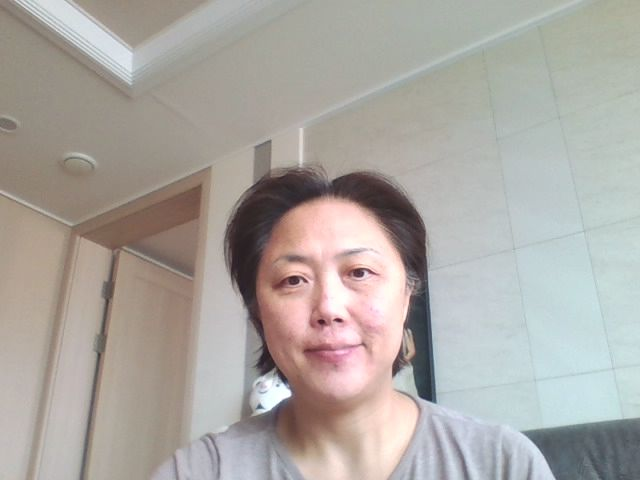

In [ ]:

from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

-------------------------------------------------------------------------------

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # yolov5 폴더 생성
%cd yolov5
%pip install -r requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.9.0+cu102 (Tesla K80)


In [ ]:
# train_data.zip 파일을 /content에 업로드 후에 작업
!unzip -q ../train_data.zip -d ../

# /content/train_data폴더가 생기고 미리 만들어 둔 images, labels도 포함되어 있음
# 폴더생성 확인후에는 train_data.zip 파일 제거 가능!!

In [ ]:
# 편집해서 저장해 놓은 webcam_data.yaml 파일을 yolov5 아래에 업로드 후에 명령내림!!

%cat /content/yolov5/webcam_data.yaml

train: ../train_data/images/train   # train images 
val: ../train_data/images/val        # val images 

# Classes
nc: 1  # number of classes
names: [ 'face' ]  # class names

In [ ]:

%cd /content/yolov5

# ! python train.py --img 416 --batch 16 --epochs 50 --data /content/data.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name raccon_yolov5s_result
! python train.py --img 640 --batch 10 --epochs 50 --data ./webcam_data.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --cache --name webcam_yolov5s_result

/content/yolov5
train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=./webcam_data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=50, batch_size=10, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, entity=None, name=webcam_yolov5s_result, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1, freeze=0, patience=100
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v5.0-454-g9febea7 torch 1.9.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, h

In [ ]:
%cd /content/yolov5

! python detect.py --source ./webcam_photo.jpg --weights ./runs/train/webcam_yolov5s_result/weights/best.pt --img 640 --conf 0.5 

/content/yolov5
detect: weights=['./runs/train/webcam_yolov5s_result/weights/best.pt'], source=./webcam_photo.jpg, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 v5.0-454-g9febea7 torch 1.9.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 224 layers, 7053910 parameters, 0 gradients, 16.3 GFLOPs
image 1/1 /content/yolov5/webcam_photo.jpg: 480x640 Done. (0.028s)
Speed: 0.5ms pre-process, 28.5ms inference, 0.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2
